<a href="https://colab.research.google.com/github/Keyko-mb/AnalysisLabs/blob/main/%D0%98%D1%82%D0%BE%D0%B3%D0%BE%D0%B2%D1%8B%D0%B9_%D0%BF%D1%80%D0%BE%D0%B5%D0%BA%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Описание проекта

Вам предоставлена выгрузка заказов из CRM компании, занимающейся В2В-продажами.  На основе
этих данных вам нужно подготовить дашборд для директора компании, который даст общее
понимание ситуации с продажами, наглядно покажет ответы на вопросы:

1. Как менеджеры выполняют план продаж?
2. Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»?
3. Какова география продаж, какие регионы самые доходные?
4. Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?
5. Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

Дашборд должен дать информацию для принятия решений:
Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
Расширять самые доходные каналы продаж, регионы, где есть высокий спрос


Задание

Откройте файл с данными и изучите общую информацию
Подготовьте данные
Проведите исследовательский анализ данных
Составьте портрет менеджера каждого региона
Проведите исследование статистических показателей
Проверьте гипотезы
Напишите общий вывод


# Загрузка данных, изучение общей информации

In [100]:
#Youre code is here
import pandas as pd
data = pd.read_excel('/content/data.xlsx')
print('Общая информация')
print(data.info())

print('\nИнформация о колонках')
print(data.columns)
print(data.dtypes)

print('\nПервые пять строк')
print(data.head())

Общая информация
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Номер заказа                  116 non-null    int64         
 1   Канал продаж                  116 non-null    object        
 2   Продуктовый сегмент           116 non-null    object        
 3   Менеджер                      116 non-null    object        
 4   Название заказа               116 non-null    object        
 5   Продавец                      116 non-null    object        
 6   Город                         116 non-null    object        
 7   Продажи факт, тыс.руб         116 non-null    int64         
 8   Продажи план, тыс.руб         116 non-null    int64         
 9   Дата сделки                   116 non-null    datetime64[ns]
 10  Дата оплаты                   93 non-null     datetime64[ns]
 11  Дней между сдел

# Подготовка данных

Замените названия столбцов при необходимости (приведите к нижнему регистру); Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему; Обработайте пропуски при необходимости: Объясните, почему заполнили пропуски определённым образом или почему не стали это делать; Опишите причины, которые могли привести к пропускам; Посчитайте суммарные фактические продажи по всем городам и запишите их в отдельный столбец.

In [101]:
#Youre code is here
data.set_axis(['номер_заказа', 'канал_продаж', 'продуктовый_сегмент', 'менеджер',
       'название_заказа', 'продавец', 'город', 'продажи_факт,_тыс.руб',
       'продажи_план,_тыс.руб', 'дата_сделки', 'дата_оплаты',
       'дней_между_сделкой_и_оплатой', 'статус'],axis = 'columns',inplace = True)

data['дней_между_сделкой_и_оплатой'] = pd.to_numeric(data['дней_между_сделкой_и_оплатой'], errors='coerce')
data['дней_между_сделкой_и_оплатой'] = data['дней_между_сделкой_и_оплатой'].fillna(-1)

print('Информация о колонках после преобразования')
print(data.columns)
print(data.dtypes)

Информация о колонках после преобразования
Index(['номер_заказа', 'канал_продаж', 'продуктовый_сегмент', 'менеджер',
       'название_заказа', 'продавец', 'город', 'продажи_факт,_тыс.руб',
       'продажи_план,_тыс.руб', 'дата_сделки', 'дата_оплаты',
       'дней_между_сделкой_и_оплатой', 'статус'],
      dtype='object')
номер_заказа                             int64
канал_продаж                            object
продуктовый_сегмент                     object
менеджер                                object
название_заказа                         object
продавец                                object
город                                   object
продажи_факт,_тыс.руб                    int64
продажи_план,_тыс.руб                    int64
дата_сделки                     datetime64[ns]
дата_оплаты                     datetime64[ns]
дней_между_сделкой_и_оплатой           float64
статус                                  object
dtype: object


<ipython-input-101-12035007be98>:2: FutureWarning: DataFrame.set_axis 'inplace' keyword is deprecated and will be removed in a future version. Use `obj = obj.set_axis(..., copy=False)` instead
  data.set_axis(['номер_заказа', 'канал_продаж', 'продуктовый_сегмент', 'менеджер',


Привела все названия к нижнему регистру;
заменила пробелы между словами на нижние подчеркивания.
Привела значения в столбце 'дней между сделкой оплатой' к числовому типу, так как этот столбец показывает количество дней.


In [102]:
print('Пропущенные значения:\n', data.isnull().sum())
print('\nКоличество дубликатов: ', data.duplicated().sum())
print('\nПодсчет продаж со статусом "В процессе" и "Потерянно"')
data.query('статус=="В процессе" | статус=="Потерянно"').count()
data = data.fillna('Не оплачено')
print('\nПропущенные значения после редактирования:\n', data.isnull().sum())

Пропущенные значения:
 номер_заказа                     0
канал_продаж                     0
продуктовый_сегмент              0
менеджер                         0
название_заказа                  0
продавец                         0
город                            0
продажи_факт,_тыс.руб            0
продажи_план,_тыс.руб            0
дата_сделки                      0
дата_оплаты                     23
дней_между_сделкой_и_оплатой     0
статус                           0
dtype: int64

Количество дубликатов:  0

Подсчет продаж со статусом "В процессе" и "Потерянно"

Пропущенные значения после редактирования:
 номер_заказа                    0
канал_продаж                    0
продуктовый_сегмент             0
менеджер                        0
название_заказа                 0
продавец                        0
город                           0
продажи_факт,_тыс.руб           0
продажи_план,_тыс.руб           0
дата_сделки                     0
дата_оплаты                     0
дней_меж

Дубликаты отсутствуют, есть 23 пропуска в столбцах 'дата оплаты' и 'дней между сделкой и оплатой'. Пропуски могут быть вызваны тем, что дела со статусом 'В процессе' и 'Потерянно' не были оплачены. Вывела строки с таким статусом, их также 23. Причина подтвердилась.
Удалять строки с пропущенными значениями не стоит, так как эта информация может пригодиться для анализа (к тому же, тогда теряется смысл столбца 'статус', так как там останется только одно значение 'Закрыто').
Заполнила пропущенные значения строкой 'не оплачено'.


In [103]:
sales_in_cities = data.groupby('город')['продажи_факт,_тыс.руб'].sum()
print(sales_in_cities)

город
Волгоград          4250
Казань             8040
Кемерово           1500
Курск               700
Липецк                0
Магнитогорск       7680
Москва             3717
Нижний Новгород    1635
Новосибирск        5725
Омск                250
Оренбург           2750
Пермь               770
Самара             5574
Санкт-Петербург    1370
Саратов             430
Севастополь           0
Сочи               6950
Стоврополь            0
Тула               1850
Улан-Удэ            970
Уфа                4350
Челябинск          8700
Ярославль             0
Name: продажи_факт,_тыс.руб, dtype: int64


Подсчитала суммарные фактические продажи по всем городам. Имеются города с продажами в 0 тыс.рублей. Это связано как раз-таки с не оплаченными заказами.

# Исследовательский анализ данных

Проведите исследовательский анализ данных

Посмотрите, как менеджеры выполняют план продаж.  Какова помесячная динамика выполнения плана, есть ли сезонные «просадки»? Важны ли данные за все периоды?

In [104]:
#Youre code is here
data['месяц_сделки'] = pd.DatetimeIndex(data['дата_сделки']).month
data['год_сделки'] = pd.DatetimeIndex(data['дата_сделки']).year
data['план_выполнен'] = (data['продажи_план,_тыс.руб'] - data['продажи_факт,_тыс.руб']) <= 0
print('Основная таблица с новыми столбцами')
data.head()

Основная таблица с новыми столбцами


,номер_заказа,канал_продаж,продуктовый_сегмент,менеджер,название_заказа,продавец,город,"продажи_факт,_тыс.руб","продажи_план,_тыс.руб",дата_сделки,дата_оплаты,дней_между_сделкой_и_оплатой,статус,месяц_сделки,год_сделки,план_выполнен
0,7290,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,300,500,2020-02-03,2020-03-25 00:00:00,52.0,Закрыто,2,2020,False
1,7291,Рекомендация,Ткань и аксессуары,С. Милер,CP Ткань,Айсберг,Санкт-Петербург,450,500,2020-03-22,2020-04-05 00:00:00,15.0,Закрыто,3,2020,False
2,7436,Рекомендация,Ткань и аксессуары,С. Милер,UNIZIN COMPANY,Айсберг,Санкт-Петербург,0,500,2020-03-23,Не оплачено,-1.0,В процессе,3,2020,False
3,7484,Рекомендация,Ткань и аксессуары,С. Милер,NAM SUNG,Айсберг,Санкт-Петербург,500,500,2020-03-04,2020-03-04 00:00:00,1.0,Закрыто,3,2020,True
4,7040,Холодный звонок,Электронные устройства,М. Баили,Электронные устройства,Alen.com,Магнитогорск,100,1000,2020-02-19,2020-05-15 00:00:00,87.0,Закрыто,2,2020,False


Добавила к основной таблице столбец 'месяц сделки', 'год сделки' и 'план выполнен', чтобы определить помесячную динамику выполнения плана.

Сделала сводную таблицу по менеджерам 'month_managers', также добавила в качестве группироки по месяцам столбцы 'месяц сделки' и 'год сделки'. Пропущенные значения заменила нулями.

In [105]:
month_managers = data.pivot_table(index='менеджер', columns=['месяц_сделки', 'год_сделки'], values=['план_выполнен'])
month_managers = month_managers.fillna(0)
print('Сводная таблица по менеджерам')
print(month_managers)

Сводная таблица по менеджерам
             план_выполнен                                                     \
месяц_сделки            1         2     3    4    5    6         7    10   11   
год_сделки            2020      2020  2020 2020 2020 2019 2020 2019 2019 2019   
менеджер                                                                        
А. Перри          0.000000  0.000000  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
А. Фостер         1.000000  0.666667  0.50  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
М. Баили          0.642857  0.400000  0.30  0.0  0.0  0.0  0.0  0.0  0.0  0.5   
Р. Хайерс         0.000000  0.363636  0.00  0.0  1.0  0.0  0.0  0.0  0.0  0.0   
С. Милер          0.000000  0.000000  0.25  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
Т. Ли             0.000000  0.000000  0.00  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

                   
месяц_сделки   12  
год_сделки   2019  
менеджер           
А. Перри      0.0  
А. Фостер     0.0  
М. Баили      0.0  
Р. Хайерс     0.0  

<Axes: xlabel='год_сделки,месяц_сделки'>

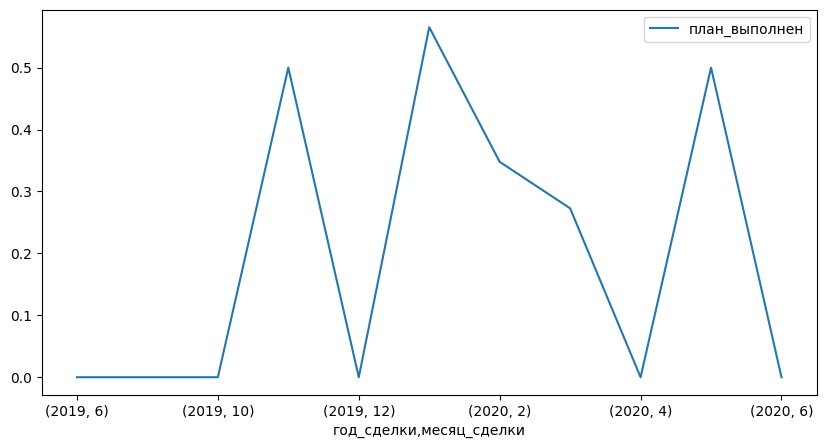

In [111]:
month_plans = data.pivot_table(index=['год_сделки', 'месяц_сделки'], values=['план_выполнен'])
month_plans.plot(figsize=(10,5))

Построила график по месяцам, чтобы посмотреть есть ли сезонные просадки. План был выполнен хотя бы наполовину только 3 раза. С июня по октябрь план не был выполнен совсем. Просадки по месяцам наблюдаются.

Посмотрите, как менялись продажи по продуктовым сегментам. Выберите сегменты с наибольшими суммарными продажами и постройте распределение по месяцам. Есть ли популярные в прошлом сегменты, у которых сейчас продажи на нуле.

продуктовый_сегмент
Оборудование          35099
Другое                 7225
Свет                   6950
Ткань и аксессуары     5712
Одежда                 4650
Name: продажи_факт,_тыс.руб, dtype: int64


<Axes: xlabel='год_сделки,месяц_сделки'>

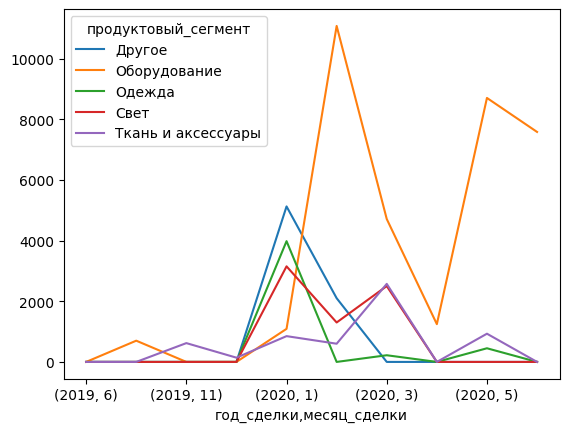

In [112]:
segment_sales = data.groupby('продуктовый_сегмент')['продажи_факт,_тыс.руб'].sum().sort_values(ascending = False).head()
print(segment_sales)
popular_segments = data.query('продуктовый_сегмент in ["Оборудование", "Другое" , "Свет" , "Ткань и аксессуары" , "Одежда"]')
segment_pivot = popular_segments.pivot_table(index=['год_сделки', 'месяц_сделки'], columns='продуктовый_сегмент', values='продажи_факт,_тыс.руб', aggfunc='sum')
segment_pivot = segment_pivot.fillna(0)
segment_pivot.plot()

Самый доходный по популярным категориям месяц - 01.2020. Продуктовый сегмент "Другое" имел высокую популярность, но позже ее потерял. Самым популярным является сегмент "Оборудование".

Какова география продаж, какие регионы самые доходные?

In [108]:
data.groupby('город')['продажи_факт,_тыс.руб'].sum().sort_values(ascending=False).head(10)

город
Челябинск       8700
Казань          8040
Магнитогорск    7680
Сочи            6950
Новосибирск     5725
Самара          5574
Уфа             4350
Волгоград       4250
Москва          3717
Оренбург        2750
Name: продажи_факт,_тыс.руб, dtype: int64

Как влияет канал продаж на выполнение плана, конверсию, длительность сделки?

In [109]:
data['план_выполнен'] = (data['продажи_план,_тыс.руб'] - data['продажи_факт,_тыс.руб']) <= 0
channel_pivot = data.pivot_table(index=['канал_продаж', 'статус', 'план_выполнен'], values=['дней_между_сделкой_и_оплатой', 'номер_заказа'], aggfunc={'номер_заказа':'count', 'дней_между_сделкой_и_оплатой':'mean'})
channel_pivot

дней_между_сделкой_и_оплатой  \
канал_продаж        статус     план_выполнен                                 
Вебсайт             Закрыто    False                             20.000000   
                    Потерянно  False                             -1.000000   
Выставка            В процессе False                             -1.000000   
                    Закрыто    False                              6.944444   
                               True                              13.300000   
Контекстная реклама В процессе False                             -1.000000   
                    Закрыто    False                             29.800000   
                    Потерянно  False                             -1.000000   
Почта               Закрыто    False                             33.000000   
                               True                             105.000000   
                    Потерянно  False                             -1.000000   
Рекомендация        В процессе False                             -1.000000   
                    Закрыто    False                             27.142857   
                               True                              25.545455   
                    Потерянно  False                             -1.000000   
Холодный звонок     В процессе False                             -1.000000   
                    Закрыто    False                             37.944444   
                               True                              53.166667   
                    Потерянно  False                             -1.000000   

                                              номер_заказа  
канал_продаж        статус     план_выполнен                
Вебсайт             Закрыто    False                     2  
                    Потерянно  False                     1  
Выставка            В процессе False                     8  
                    Закрыто    False                    18  
                               True                     10  
Контекстная реклама В процессе False                     1  
                    Закрыто    False                     5  
                    Потерянно  False                     2  
Почта               Закрыто    False                     2  
                               True                      1  
                    Потерянно  False                     1  
Рекомендация        В процессе False                     4  
                    Закрыто    False                    14  
                               True                     11  
                    Потерянно  False                     3  
Холодный звонок     В процессе False                     1  
                    Закрыто    False                    18  
                               True                     12  
                    Потерянно  False                     2

Самые длительные сделки осуществляются через почту, самые быстрые через выставку. Больше всего сделок закрыто с помощью каналов "Рекомендация", "Холодный звонок" и "Выставка".

Какие товарные категории пользуются спросом (по числу клиентов) и по продажам?

In [110]:
segment_sales = data.groupby('продуктовый_сегмент').agg({'продажи_факт,_тыс.руб': ['sum'], 'номер_заказа': ['count']})
segment_sales

,"продажи_факт,_тыс.руб",номер_заказа
,sum,count
продуктовый_сегмент,,
Автозапчасти,700,1
Бассейн,1500,1
Другое,7225,10
Игрушки,250,2
Косметика,200,1
Медецина,400,1
Оборудование,35099,46
Одежда,4650,6


Самой большой популярностью пользуются категории 'Оборудование', 'Ткань и аксессуары' и 'Свет', самой низкой 'Охота и рыбалка'.

# Общий вывод
На основании исследовательского анализа сделайте вывод относительно того, что стоит ли
 - Профилировать ли менеджеров по товарным категориям или каналам продаж (где они лучше закрывают сделки, выполняют план)
 - Расширять самые доходные каналы продаж, регионы, где есть высокий спрос

Большинство менеджеров выполняют план продаж независимо от сезона и месяца.
Что касается каналов продаж, "Выставка", "Рекомендация" и "Холодные звонок" лидируют по кол-ву закрытых сделок.
Челябинск, Казань и Магнитогорск являются самыми доходными регионами.
'Оборудование', 'Ткань и аксессуары' и 'Свет' являются самыми доходными и востребованными категориями.
Строит расширить продажи по этим категориям в этих городах и профилировать менеджеров по этим же категориям и по лидирующим каналам продаж.